In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Dataset/placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

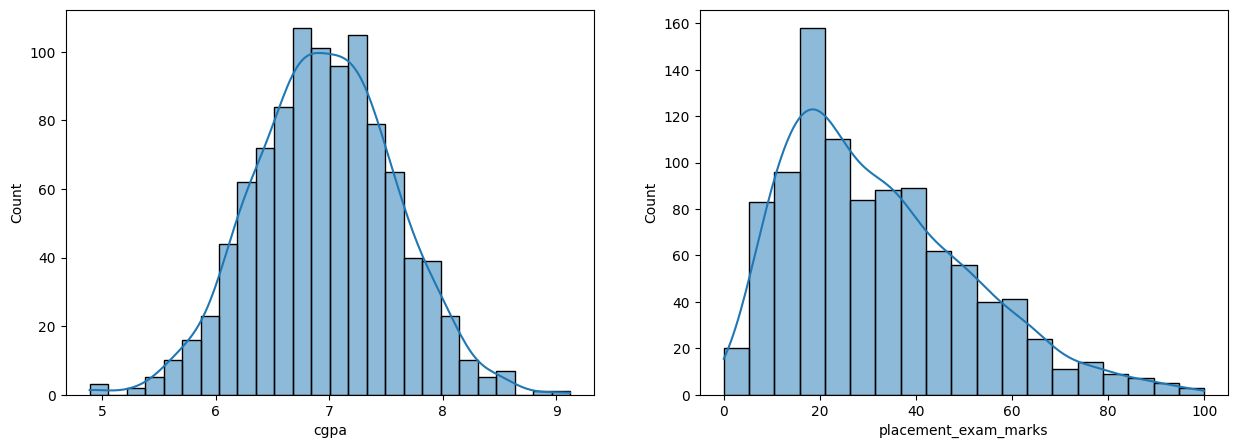

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde = True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde = True)

<Axes: >

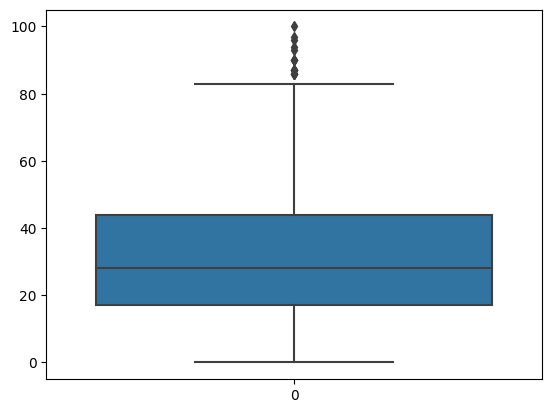

In [42]:
sns.boxplot(df['placement_exam_marks'])

In [43]:
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 , percentile25 , 

(44.0, 17.0)

In [56]:
#  For percentile method / Winsarization 

In [ ]:
# upper_limit = df['placement_exam_marks'].quantile(0.99)
# lower_limit = df['placement_exam_marks'].quantile(0.01)

In [44]:
iqr = percentile75 - percentile25
iqr

27.0

In [45]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [46]:
upper_limit = percentile75 + 1.5*iqr

In [47]:
df[df["placement_exam_marks"] > upper_limit ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [48]:
#  Trimming

In [49]:
new_df = df[df["placement_exam_marks"] < upper_limit ]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: >

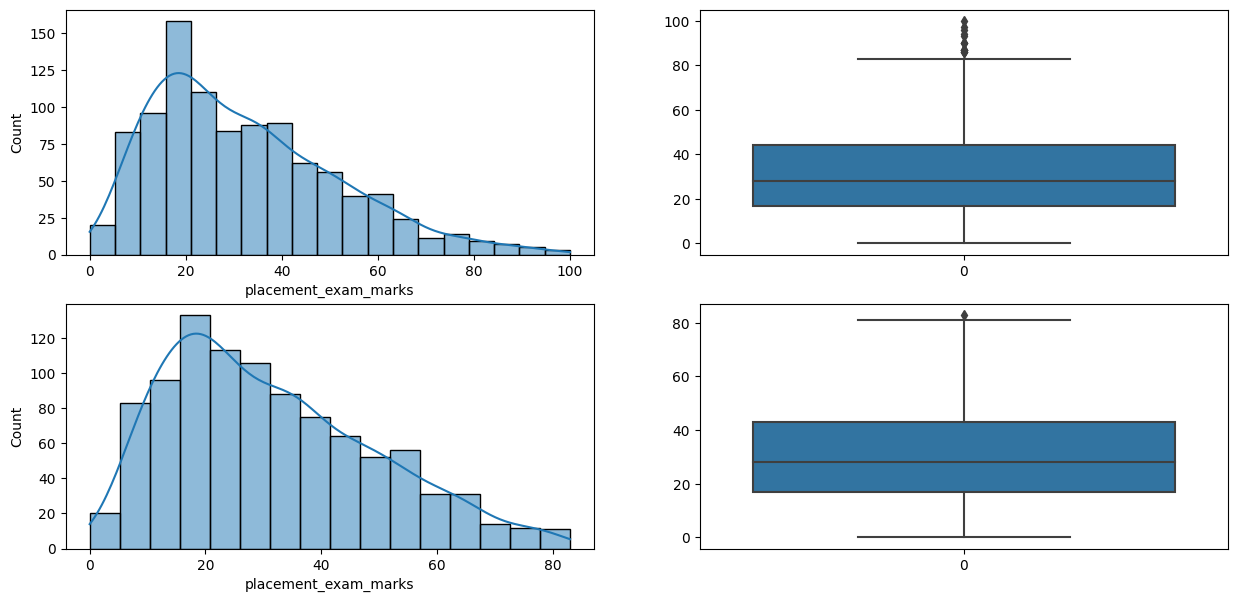

In [50]:
#  Comparing
plt.figure(figsize  = (15,7))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

#  Capping

In [51]:
upper_limit

84.5

In [37]:
# np.where(condition, True, False)

In [52]:
new_df2 = df.copy()

In [53]:
new_df2['placement_exam_marks'] = np.where(new_df2['placement_exam_marks']>upper_limit, upper_limit,new_df2['placement_exam_marks'])

In [54]:
new_df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: >

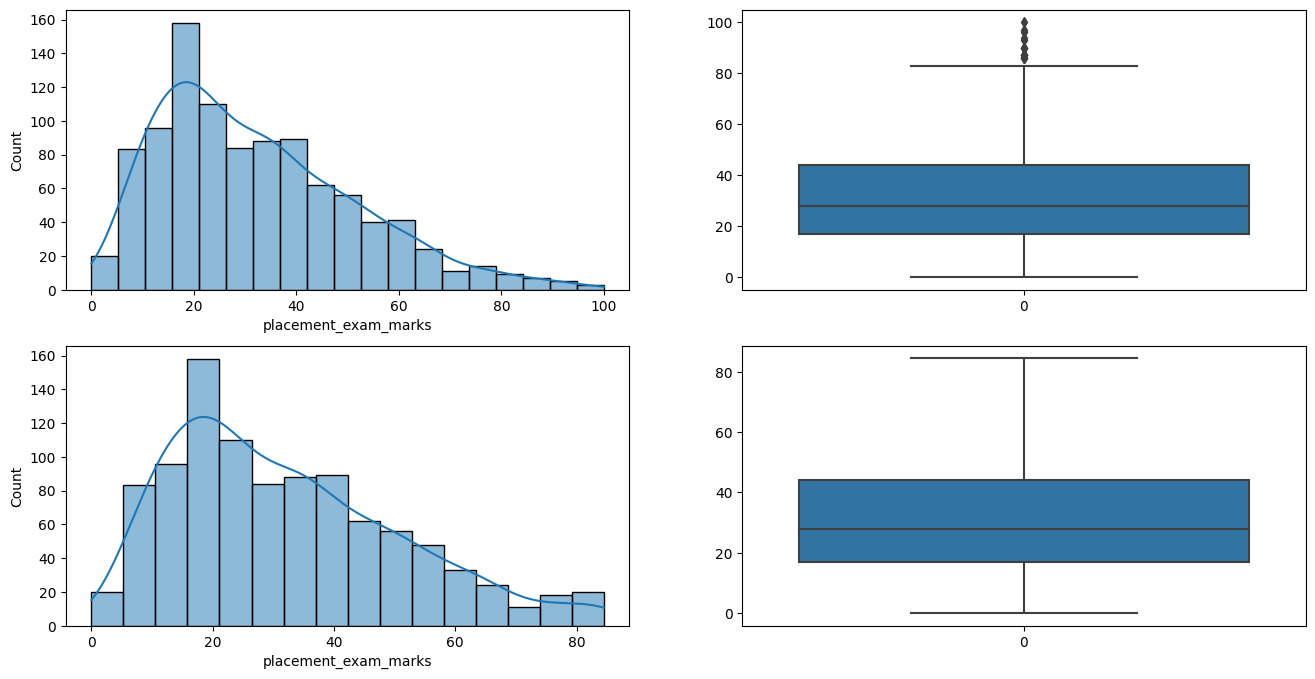

In [55]:
plt.figure(figsize = (16,8))
plt.subplot(221)
sns.histplot(df['placement_exam_marks'] , kde = True)

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.histplot(new_df2['placement_exam_marks'],kde = True)

plt.subplot(224)
sns.boxplot(new_df2['placement_exam_marks'])